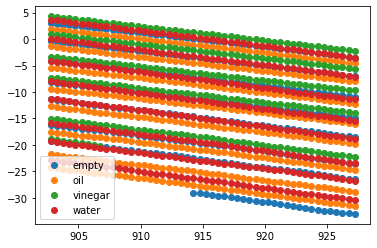

In [1]:
import glob, os
## 导入数据
matls = ['empty', 'oil', 'vinegar', 'water']
y = []
d_p = []
d_r = []

for matl in matls:
    df_f = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\outdoor\\front-tail\\outdoor_all_f_%s_aligned.csv' % matl)
    df_t = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\outdoor\\front-tail\\outdoor_all_t_%s_aligned.csv' % matl)
#     diff_phase = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
    diff_phase = df_f['PHASE'] - df_t['PHASE']
    diff_rssi = df_f['RSSI'] - df_t['RSSI']
    d_p.extend(diff_phase)
    d_r.extend(diff_rssi)
    plt.scatter(df_f['CHANNEL'], df_f['PHASE'])
#     plt.scatter(diff_phase, diff_rssi)
    y.extend(np.repeat([matl], len(diff_phase)))
    
plt.legend(matls)
X = np.column_stack((d_p, d_r))
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

import pickle
pickle.dump(model, open('model_gauss_bayes_label.joblib', 'wb'))

----------empty------------
50 50
----------oil------------
50 50
----------vinegar------------
50 50
----------water------------
50 50


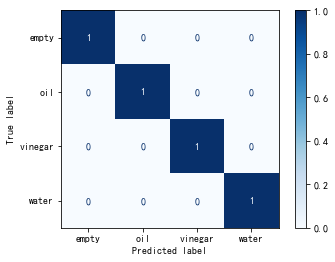

In [2]:

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

## outdoor测试
matls = ['empty', 'oil', 'vinegar', 'water']
d_r = []
d_p = []
y = []
for matl in matls:
    print('----------%s------------' % matl)
    df_test_f = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\grill\\outdoor\\outdoor_d1_%s_front_kde_outdoor.csv' % matl)
    df_test_t = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\grill\\outdoor\\outdoor_d1_%s_tail_kde_outdoor.csv' % matl)

    print(len(df_test_f), len(df_test_t))
    diff_r = df_test_f['RSSI'] - df_test_t['RSSI']
    diff_p = np.unwrap(df_test_f['PHASE']) - np.unwrap(df_test_t['PHASE'])
    
    y.extend(np.repeat([matl], len(diff_p)))
    d_r.extend(diff_r)
    d_p.extend(diff_p)

X_test = np.column_stack((d_p, d_r))
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(model, X_test, y,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

----------empty------------
50 50
----------oil------------
50 50
----------vinegar------------
50 50
----------water------------
50 50


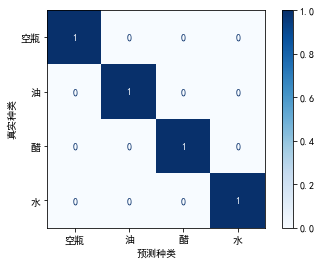

In [3]:
## 室内测试
matls = ['empty', 'oil', 'vinegar', 'water']
d_r = []
d_p = []
y = []
for matl in matls:
    print('----------%s------------' % matl)
    df_test_f = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\grill\\noback\\d1_%s_front_noback.csv' % matl)
    df_test_t = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\grill\\noback\\d1_%s_tail_noback.csv' % matl)

    print(len(df_test_f), len(df_test_t))
    diff_r = df_test_f['RSSI'] - df_test_t['RSSI']
    diff_p = np.unwrap(df_test_f['PHASE']) - np.unwrap(df_test_t['PHASE'])
    
    y.extend(np.repeat([matl], len(diff_p)))
    d_r.extend(diff_r)
    d_p.extend(diff_p)
    
X_test = np.column_stack((d_p, d_r))
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(model, X_test, y,
                                 cmap=plt.cm.Blues,
                                 display_labels=['空瓶', '油', '醋', '水'],
                                 normalize='true')

plt.xlabel('预测种类')
plt.ylabel('真实种类')
plt.savefig('result_open_conf_mat.pdf', bbox_inches='tight')

In [4]:
import glob, os
## 只用一个距离
matls = ['empty', 'oil', 'vinegar', 'water']
y = []
d_p = []
d_r = []

for matl in matls:
    df_f = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\outdoor\\front-tail\\outdoor_all_f_%s_aligned.csv' % matl).groupby('DISTANCE').get_group)
    df_t = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\outdoor\\front-tail\\outdoor_all_t_%s_aligned.csv' % matl)
    diff_phase = df_f['PHASE'] - df_t['PHASE']
    diff_rssi = df_f['RSSI'] - df_t['RSSI']
    
    d_p.extend(diff_phase)
    d_r.extend(diff_rssi)
    plt.scatter(diff_phase, diff_rssi)
    y.extend(np.repeat([matl], len(diff_phase)))
    
plt.legend(matls)
X = np.column_stack((d_p, d_r))
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

import pickle
pickle.dump(model, open('model_gauss_bayes_d1.joblib', 'wb'))

SyntaxError: unmatched ')' (<ipython-input-4-bf007327755b>, line 9)

----------empty------------
377 377
----------oil------------
400 400
----------vinegar------------
260 260
----------water------------
400 400


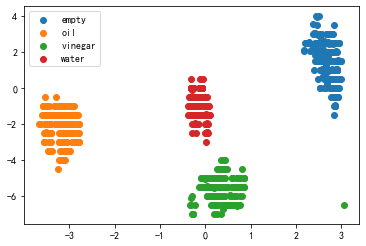

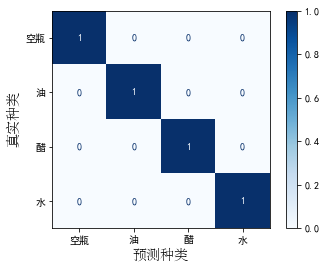

In [6]:

import matplotlib.font_manager as font_manager
import matplotlib
Songti = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\STSONG.TTF')

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

## outdoor测试
matls = ['empty', 'oil', 'vinegar', 'water']
d_r = []
d_p = []
y = []
for matl in matls:
    print('----------%s------------' % matl)
    df_test_f = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\outdoor\\front-tail\\outdoor_all_f_%s_aligned.csv' % matl)
    df_test_t = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\outdoor\\front-tail\\outdoor_all_t_%s_aligned.csv' % matl)

    print(len(df_test_f), len(df_test_t))
    diff_r = df_test_f['RSSI'] - df_test_t['RSSI']
    diff_p = df_test_f['PHASE'] - df_test_t['PHASE']
    
    plt.scatter(diff_p, diff_r)
    
    y.extend(np.repeat([matl], len(diff_p)))
    d_r.extend(diff_r)
    d_p.extend(diff_p)

plt.legend(matls)
X_test = np.column_stack((d_p, d_r))
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(model, X_test, y,
                                 cmap=plt.cm.Blues,
                                 display_labels=['空瓶', '油', '醋', '水'],
                                 normalize='true')

plt.xlabel('预测种类', fontproperties=Songti, fontsize=14)
plt.ylabel('真实种类', fontproperties=Songti, fontsize=14)
plt.savefig('result_open_conf_mat2.pdf', bbox_inches='tight')
# y = classifier.predict(X_test)